In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [4]:
image = cv2.imread("51.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

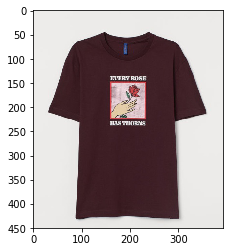

In [5]:
plt.imshow(image)

In [6]:
image = image.reshape((image.shape[0] * image.shape[1], 3))

In [8]:
clt = KMeans(n_clusters = 3)
clt.fit(image)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [ ]:
### HISTOGRAM

In [14]:
numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
(hist, _) = np.histogram(clt.labels_, bins = numLabels)
hist = hist.astype("float")
hist /= hist.sum()

In [ ]:
### PLOTTING

In [17]:
centroids = clt.cluster_centers_

In [19]:
bar = np.zeros((50, 300, 3), dtype = "uint8")
startX = 0
for (percent, color) in zip(hist, centroids):
		# plot the relative percentage of each cluster
		endX = startX + (percent * 300)
		cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),color.astype("uint8").tolist(), -1)
		startX = endX

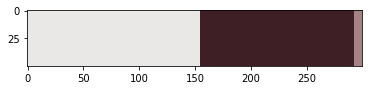

In [20]:
plt.imshow(bar)